<a href="https://colab.research.google.com/github/tsutsumi-ozro/NLP100knock/blob/main/NLP100knock_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [ ]:
!wget https://nlp100.github.io/data/neko.txt

--2022-03-30 23:38:25--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.05s   

2022-03-30 23:38:25 (19.6 MB/s) - ‘neko.txt’ saved [975789/975789]



In [ ]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 39 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-jumandic-utf8 all 7.0-20130310-4 [16.2 MB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd6

In [ ]:
!mecab -o ./neko.txt.mecab ./neko.txt

In [ ]:
!head -15 ./neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ


## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [ ]:
filename = './neko.txt.mecab'
sentences = []
morphs = []
with open(filename, mode='r') as f:
  for line in f: #lineには一行が入ってる
    if line != "EOS\n":  #lineにはEOS\nが改行するために入ってる
      fields = line.split('\t') #空白(単語区切り)に分けるのでfieldsには単語、名詞などが入ってる
      if len(fields) != 2 or fields[0] == "": #文頭以外の空白と改行文字はスキップらしい。よくわからん
        continue
      else:
        attr = fields[1].split(",")
        morph = {'surface': fields[0], 'base':attr[6], 'pos':attr[0], 'pos1':attr[1]}
        morphs.append(morph)
    else:
      sentences.append(morphs)
      morphs = []
for morph in sentences[2]:
  print(morph)     

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


## 31. 動詞
動詞の表層系を全て抽出せよ

In [ ]:
ans = set()
#sentencesには改行するまでのmorphが全て入ってる
for sentence in sentences:
  for marph in sentence:
    if marph['pos'] == '動詞':
      ans.add(marph['surface'])
print(f'動詞の表層系の種類: {len(ans)}\n')
for v in list(ans)[:10]:
  print(v)


動詞の表層系の種類: 3893

収め
授ける
なで
燃える
違わ
巻き込ま
はらっ
える
出よ
引っ繰り返し


## 32. 動詞の基本形
動詞の基本形をすべて抽出せよ．

In [ ]:
ans = set()
#sentencesには改行するまでのmorphが全て入ってる
for sentence in sentences:
  for marph in sentence:
    if marph['pos'] == '動詞':
      ans.add(marph['base'])
print(f'動詞の基本形の種類: {len(ans)}\n')
for v in list(ans)[:10]:
  print(v)


動詞の基本形の種類: 2300

授ける
燃える
える
抛り出す
睨み合う
取上げる
降り込む
ぶる
焦る
こす


## 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．



In [ ]:
ans = set()
for sentence in sentences:
  for i in range(1, len(sentence) - 1):
    if sentence[i-1]['pos'] == '名詞' and sentence[i]['surface']=='の' and sentence[i+1]['pos']=='名詞':
      ans.add(sentence[i-1]['surface']+sentence[i]['surface']+sentence[i+1]['surface'])
print(f'名詞+の+名詞　の種類: {len(ans)}\n')
for v in list(ans)[:10]:
  print(v)

名詞+の+名詞　の種類: 4924

自己の力量
男女の個性
磁気の研究
感服の至り
正当の手続き
馬鹿の癖
木の枝
木綿の羽織
陛下のよう
中の娘


## 34. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ

In [ ]:
ans = set()
for sentence in sentences:
  nouns = ''
  num = 0
  for morph in sentence:
    if morph['pos'] == '名詞':
      nouns = ''.join([nouns, morph['surface']])
      num += 1
    elif num >= 2:
      ans.add(nouns)
      nouns = ""
      num = 0
    else:
      nouns=""
      num = 0
  if num >= 2:
    ans.add(nouns)
print(f'連接名詞の種類: {len(ans)} \n')
for v in list(ans)[:10]:
  print(v)

連接名詞の種類: 4457 

力学上
八木独仙
一偉観
君注意
出世間的
事風呂敷包
友某
霜解
哲学者先生
穴二つ幽か


## 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ

In [ ]:
from collections import defaultdict

ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans[morph['base']] += 1
ans = sorted(ans.items(), key=lambda x:x[1], reverse=True)
for w in ans[:10]:
  print(w)

('の', 9194)
('て', 6848)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5972)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)


## 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ

In [ ]:
import matplotlib.pyplot as plt
!pip install japanize_matplotlib
import japanize_matplotlib
%matplotlib inline

     |████████████████████████████████| 4.1 MB 5.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=6a0a685d723e75c58ba2d661cb2eb0b06d06fd86009089107f99f21365bcbd87
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


<BarContainer object of 10 artists>

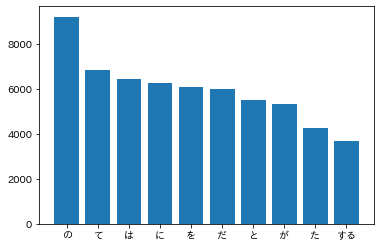

In [ ]:
keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.bar(keys, values)

## 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

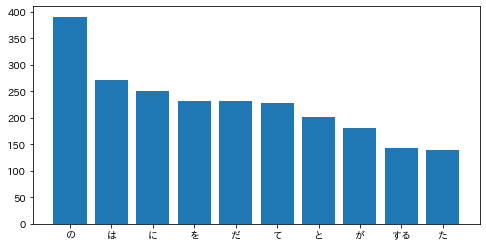

In [ ]:
#天才やん
ans = defaultdict(int)
for sentence in sentences:
  if '猫' in [morph['surface'] for morph in sentence]:  # 文章の形態素に「猫」が含まれる場合のみ辞書に追加
    for morph in sentence:
      if morph['pos'] != '記号':
        ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
del ans['猫']
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

## 38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

(array([1.1031e+04, 9.6000e+01, 3.1000e+01, 1.7000e+01, 6.0000e+00,
        5.0000e+00, 5.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00,
        4.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

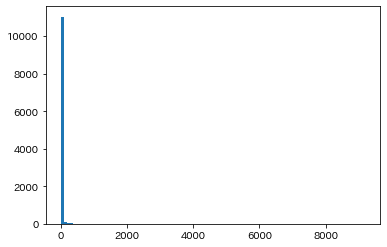

In [ ]:
ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = ans.values()
ans
plt.hist(ans, bins=100)

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

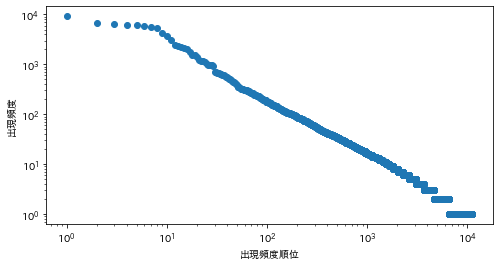

In [ ]:
import math

ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans[morph['base']] += 1
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

ranks = [r + 1 for r in range(len(ans))]
values = [a[1] for a in ans]
plt.figure(figsize=(8, 4))
plt.scatter(ranks, values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()